#**Netflix Machine Learning Project**

#Introduction

This project is a self made machine learning project. The dataset is called Netflix TV Shows and Movies that I download from kaggle.com. The downloaded dataset is saved in a csv file named 'titles'.

This data set was created to list all shows available on Netflix streaming, and analyze the data to find interesting facts. This data was acquired in May 2022 containing data available in the United States. 

Problem Statement of this project: Based on the data of Netflix Tv Shows and Movies, the writer aims to construct a machine learning model to determine which feature has the most impact on tmdb_score.

Sources: https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

#Importing Packages

In [77]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

#Importing Dataset

In [78]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [79]:
data = pd.read_csv('/content/drive/MyDrive/DataScience/titles.csv')
data.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],NaN,tt0075314,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],NaN,tt0071853,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],NaN,tt0079470,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],NaN,tt0070047,8.1,391942.0,95.337,7.7


#Data Preprocessing

This dataset contains +5k unique titles on Netflix with 15 columns containing their information, including:

* id: The title ID on JustWatch.
* title: The name of the title.
* show_type: TV show or movie.
* description: A brief description.
* release_year: The release year.
* age_certification: The age certification.
* runtime: The length of the episode (SHOW) or movie.
* genres: A list of genres.
* production_countries: A list of countries that produced the title.
* seasons: Number of seasons if it's a SHOW.
* imdb_id: The title ID on IMDB.
* imdb_score: Score on IMDB.
* imdb_votes: Votes on IMDB.
* tmdb_popularity: Popularity on TMDB.
* tmdb_score: Score on TMDB.

In [80]:
data.shape

(5806, 15)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5806 entries, 0 to 5805
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5806 non-null   object 
 1   title                 5805 non-null   object 
 2   type                  5806 non-null   object 
 3   description           5788 non-null   object 
 4   release_year          5806 non-null   int64  
 5   age_certification     3196 non-null   object 
 6   runtime               5806 non-null   int64  
 7   genres                5806 non-null   object 
 8   production_countries  5806 non-null   object 
 9   seasons               2047 non-null   float64
 10  imdb_id               5362 non-null   object 
 11  imdb_score            5283 non-null   float64
 12  imdb_votes            5267 non-null   float64
 13  tmdb_popularity       5712 non-null   float64
 14  tmdb_score            5488 non-null   float64
dtypes: float64(5), int64(

##Dropping Columns

In this step, we are going to remove all columns that is not significant to this project.

In [82]:
data.isna().sum()

id                         0
title                      1
type                       0
description               18
release_year               0
age_certification       2610
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_id                  444
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

We are dropping three columns, which is:

* `age_certification`: we drop this column due to a lot of blank spaces (2610) in the columns and we cannot replace the value of the blank spaces.
* `imdb_id`: we drop this column, because there is no insight that can be provided.
* `description`: we drop this column, because there is not much information that can be dug.


In [83]:
data.drop(['age_certification', 'imdb_id', 'description'], axis=1, inplace=True)

##Cleaning Data Exploration

In this step, we are going to do some data exploration to gain more insights on our dataset.

In [84]:
data.isna().sum()

id                         0
title                      1
type                       0
release_year               0
runtime                    0
genres                     0
production_countries       0
seasons                 3759
imdb_score               523
imdb_votes               539
tmdb_popularity           94
tmdb_score               318
dtype: int64

### Inspect Column `seasons` and `type`

First, we inspect the occurences of character in columns `type`:

In [85]:
occur = data.groupby(['type']).size()
occur

type
MOVIE    3759
SHOW     2047
dtype: int64

From the information above, we can see that there is a total of 3759 MOVIE in the columns `type`, which is the same number with the number of null in seasons.

To validate the statement above, we will do a second check:

In [86]:
occur2 = data.groupby(['type', 'seasons']).size()
occur2

type  seasons
SHOW  1.0        1187
      2.0         374
      3.0         181
      4.0         116
      5.0          76
      6.0          40
      7.0          16
      8.0          14
      9.0           9
      10.0          5
      11.0          7
      12.0          4
      13.0          2
      14.0          2
      15.0          4
      18.0          1
      19.0          1
      21.0          1
      24.0          3
      29.0          1
      37.0          1
      39.0          1
      42.0          1
dtype: int64

From the information above, we can see that all `type` SHOW have number of seasons, while all `type` MOVIE does not have it.

To solve this null problem in `type` column, we will replace all null in the `seasons` column with 1, as we know that every movie only have 1 season.

In [87]:
data['seasons'] = data['seasons'].replace(np.nan, 1)

### Inspect Column `genres`



Next, we will inspect column `genres`:

In [88]:
data.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,['documentation'],['US'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"['crime', 'drama']",['US'],1.0,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"['comedy', 'fantasy']",['GB'],1.0,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,94,['comedy'],['GB'],1.0,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,133,['horror'],['US'],1.0,8.1,391942.0,95.337,7.7


We will remove " [ " , " ' ", " ] " in the column `genres` in order to ease the process of EDA later.

In [89]:
data.genres = data.genres.str.replace("[",'').str.replace("]",'').str.replace("'",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



We suspect that there are some missing value undetected because of white space undetected, so we will test:



In [90]:
data = data.replace('', np.nan)

In [91]:
data.isna().sum()

id                        0
title                     1
type                      0
release_year              0
runtime                   0
genres                   68
production_countries      0
seasons                   0
imdb_score              523
imdb_votes              539
tmdb_popularity          94
tmdb_score              318
dtype: int64

There is indeed white space (68) in the column `genres` that will be drop later



### Inspect Column `runtime`

Next, we will inspect column `runtime`:

We suspect that there are some movies with 0 `runtime`:

In [92]:
data['runtime'].value_counts()[0]

24

There are 24 show/movie with 0 runtime and we decide to remove them because it does not make sense:

In [93]:
data=data[data.runtime!=0]

### Inspect Column `production_countries`

Next, we will inspect column `production_countries`:

In [94]:
data.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,documentation,['US'],1.0,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,1976,113,"crime, drama",['US'],1.0,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"comedy, fantasy",['GB'],1.0,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,94,comedy,['GB'],1.0,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,133,horror,['US'],1.0,8.1,391942.0,95.337,7.7


We will remove " [ " , " ' ", " ] " in the column 'genres' in order to ease the process of EDA later.

In [95]:
data.production_countries = data.production_countries.str.replace("[",'').str.replace("]",'').str.replace("'",'')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



We suspect that there are some missing value undetected because of white space undetected, so we will test:



In [96]:
data = data.replace('', np.nan)

In [97]:
data.isna().sum()

id                        0
title                     1
type                      0
release_year              0
runtime                   0
genres                   68
production_countries    227
seasons                   0
imdb_score              517
imdb_votes              533
tmdb_popularity          91
tmdb_score              310
dtype: int64

There is indeed white space (227) in the column `production_countries` that will be drop later

## Missing Value

In this step, we will deal with the missing value in the dataset.




Finally, we will either drop the row of the missing value or replace the missing value with other specific value in this step:

In [98]:
data.isna().sum()

id                        0
title                     1
type                      0
release_year              0
runtime                   0
genres                   68
production_countries    227
seasons                   0
imdb_score              517
imdb_votes              533
tmdb_popularity          91
tmdb_score              310
dtype: int64

In [99]:
data.isna().sum() * 100 / len(data)

id                      0.000000
title                   0.017295
type                    0.000000
release_year            0.000000
runtime                 0.000000
genres                  1.176064
production_countries    3.925977
seasons                 0.000000
imdb_score              8.941543
imdb_votes              9.218264
tmdb_popularity         1.573850
tmdb_score              5.361467
dtype: float64

* We will replace the missing value in column `['imdb_score', 'imdb_votes', 'tmdb_score']` because the percentage of the missing value > 5%. The missing value will be replace with median because they are numerical datas.

* We will drop missing value in column `['title', 'genres', 'production_countries', 'tmdb_popularity']` because the percentage of the missing value < 5%.

In [100]:
data[['imdb_score', 'tmdb_score', 'imdb_votes']] = data[['imdb_score', 'tmdb_score', 'imdb_votes']].fillna(data[['imdb_score', 'tmdb_score', 'imdb_votes']].median())

In [101]:
data=data.dropna()

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5478 entries, 0 to 5803
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5478 non-null   object 
 1   title                 5478 non-null   object 
 2   type                  5478 non-null   object 
 3   release_year          5478 non-null   int64  
 4   runtime               5478 non-null   int64  
 5   genres                5478 non-null   object 
 6   production_countries  5478 non-null   object 
 7   seasons               5478 non-null   float64
 8   imdb_score            5478 non-null   float64
 9   imdb_votes            5478 non-null   float64
 10  tmdb_popularity       5478 non-null   float64
 11  tmdb_score            5478 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 556.4+ KB



## Duplicated Data

In this step, we will deal with the duplicated data in the dataset.


In [103]:
data.duplicated().sum()

0

There is no duplicated data in the dataset


## Saving the Cleaned Data
In this step, we will save the cleaned data into df.


In [104]:
df = data.copy()

#Exploratory Data Analysis

##Statistical Summary

In this step, we are going to analyze how the values are distributed for each column

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5478 entries, 0 to 5803
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5478 non-null   object 
 1   title                 5478 non-null   object 
 2   type                  5478 non-null   object 
 3   release_year          5478 non-null   int64  
 4   runtime               5478 non-null   int64  
 5   genres                5478 non-null   object 
 6   production_countries  5478 non-null   object 
 7   seasons               5478 non-null   float64
 8   imdb_score            5478 non-null   float64
 9   imdb_votes            5478 non-null   float64
 10  tmdb_popularity       5478 non-null   float64
 11  tmdb_score            5478 non-null   float64
dtypes: float64(5), int64(2), object(5)
memory usage: 556.4+ KB


First, we will change column 'release_year' from float64 to object because it is categorical:

In [106]:
df['release_year'] = df['release_year'].astype(object)

Next, group column names based on type (numerical or categorical) in order to make the next step easier:

In [107]:
categoricals = ['id', 'title', 'type', 'release_year', 'genres', 'production_countries']

numericals = ['runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity', 'tmdb_score']

Numerical Statistical Summary

In [108]:
df[numericals].describe()

,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
count,5478.000000,5478.000000,5478.000000,5.478000e+03,5478.000000,5478.000000
mean,79.071011,1.425520,6.543939,2.265853e+04,23.195490,6.816009
std,39.293834,1.696914,1.108950,8.551929e+04,70.075016,1.127466
min,2.000000,1.000000,1.500000,5.000000e+00,0.055091,0.500000
25%,45.000000,1.000000,5.900000,6.800000e+02,3.316500,6.100000
50%,86.000000,1.000000,6.600000,2.285000e+03,7.861000,6.900000
75%,106.000000,1.000000,7.300000,9.351250e+03,18.310250,7.500000
max,251.000000,42.000000,9.500000,2.268288e+06,1823.374000,10.000000


Interpretation:
* Overall, the minimum and maximum values make sense for each column (The minimum value of column `runtime` make sense because there is a lot of shows/movies with animation genre that have a very short runtime).
* `seasons` column has not many unique values, so there is no need to conclude its simmetricity.
* Mean ~ 50% (Median) in `runtime`, `imdb_score`, `imdb_votes`, and `tmdb_score` column, indicating somewhat a symmetrical distribution
* `tmdb_popularity` column indicating a positively skewed distribution as Mean > Median, thus need to be analyzed further.

Categorical Statistical Summary

In [109]:
df[categoricals].describe()

,id,title,type,release_year,genres,production_countries
count,5478,5478,5478,5478,5478,5478
unique,5478,5432,2,67,1603,445
top,ts300399,The Gift,MOVIE,2019,comedy,US
freq,1,3,3564,788,466,1918


Interpretation:
* `id` and `title` have many unique value, so we may neglect this column for further analysis.
* There are 2 and 67 unique values for column 'type' and 'release_year'.
* There are 1603 and 445 unique values for column 'genres' and 'production_countries', which is still acceptable as there are many movie/show which have more than 1 `genres` and `production_countries`.
* Most of the Movie/Show in the dataset were released at 2019 and produced in US (United States).

##Outliers

In this step, we are going to detect outliers using Boxplot:

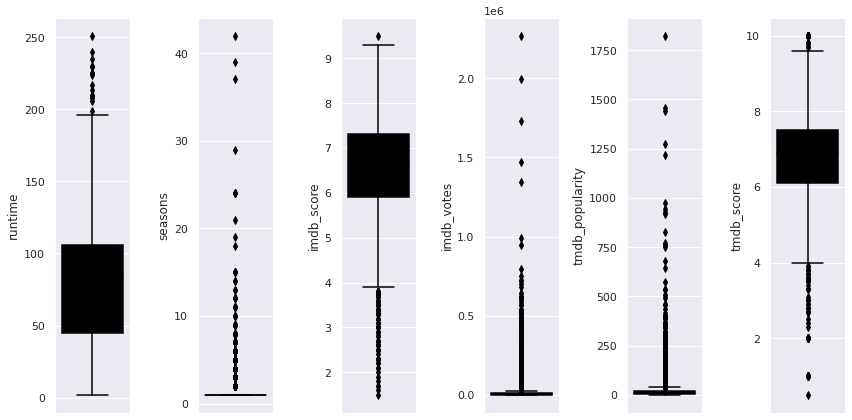

In [110]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='black')
    plt.tight_layout()

Interpretation:
* There are outliers in every column, thus we will probably need to perform Log Transformation (Log Transformation will be done at the end of EDA)

##Column Distribution

In this step, we are going to inspect Column Distribution in the numerical data:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

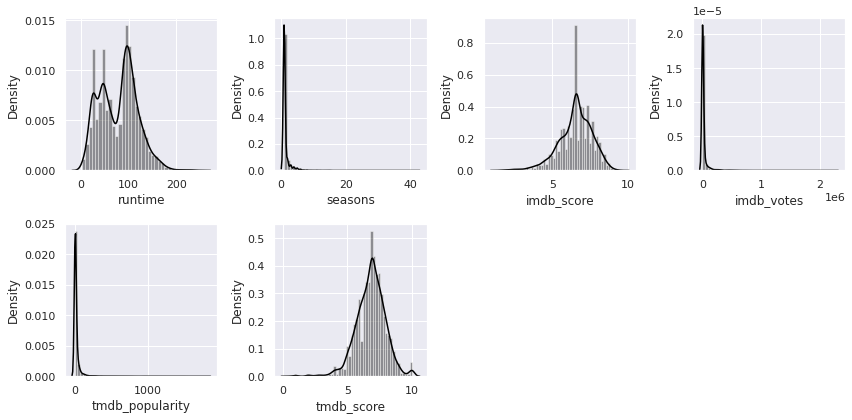

In [111]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='black')
    plt.xlabel(features[i])
    plt.tight_layout()

Interpretation:
* We can ignore interpreting `seasons` columns as it has limited discrete values
* The true continuous numeric features: `runtime`, `imdb_score`, and `tmdb_score` are somewhat symmetric, which  is good
* The column `imdb_votes` and `tmdb_popularity` are very positively skewed, thus probably need to be adjusted/processed in the next step.

##Categorical Data Count Graph

In this step, we are going to identify the count graph of some categorical data:


We are going to analyze count graph for column `type`, `release_year, `genres`, and `production_countries`.

Column `id` and `title` count graph will not be done as the columns have many unique values.

###Column `type` Count Graph

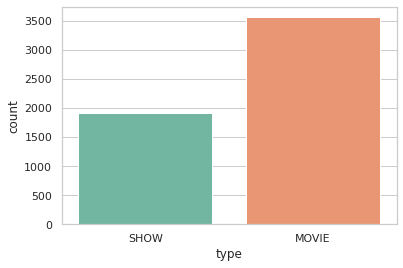

In [112]:
sns.set(style="whitegrid")
ax = sns.countplot(x="type", data=df, palette="Set2")

Interpretation:
* There are only 2 unique values in the column `type`
* The highest number of count in column `type` is in MOVIE

###Column `release_year` Count Graph

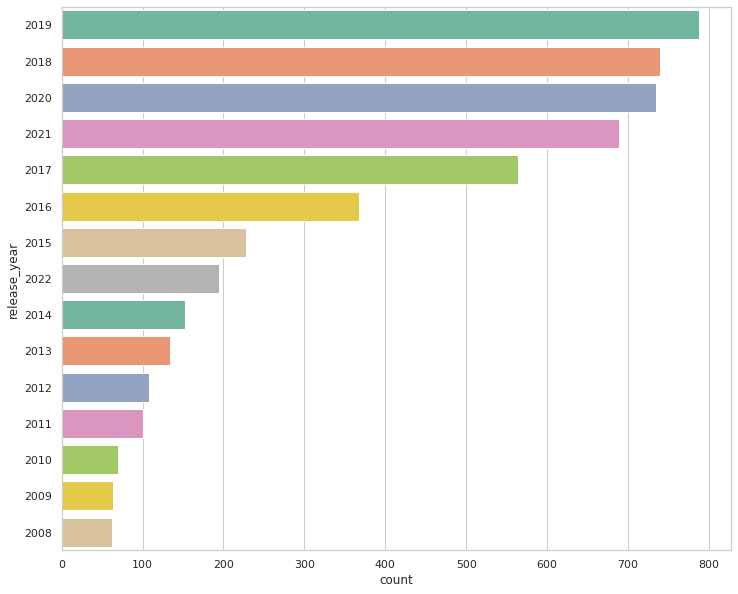

In [113]:
plt.figure(figsize=(12,10))
sns.set(style="whitegrid")
ax = sns.countplot(y="release_year", data=df, palette="Set2", order=df['release_year'].value_counts().index[0:15])

Interpretation:
* Most of the SHOW/MOVIE in the dataset were created from year 2017 to 2021

###Column `genres` Count Graph

Because there are many SHOW/MOVIE with multiple genres in the dataset, thus we will perform some actions to find the most reliable count graph

In [114]:
genres=list(df['genres'])
gen=[]

for i in genres:
    i=list(i.split(','))
    for j in i:
        gen.append(j.replace(' ',""))
g=Counter(gen)

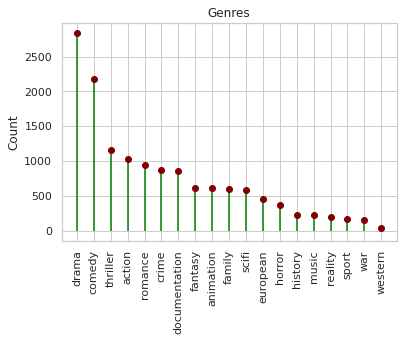

<Figure size 720x720 with 0 Axes>

In [115]:
g={k: v for k, v in sorted(g.items(), key=lambda item: item[1], reverse= True)}


fig, ax = plt.subplots()

fig = plt.figure(figsize = (10, 10))
x=list(g.keys())
y=list(g.values())
ax.vlines(x, ymin=0, ymax=y, color='green')
ax.plot(x,y, "o", color='maroon')
ax.set_xticklabels(x, rotation = 90)
ax.set_ylabel("Count")
# set a title
ax.set_title("Genres");

Interpretation:
* The most used genre is drama with more than 2500 MOVIE/SHOW, while comedy is the second most used genre in the dataset

###Column `production_countries` Count Graph

In [116]:
dfg = df.groupby(['production_countries']).size().to_frame().sort_values([0], ascending = False).head(10).reset_index()
dfg.production_countries= dfg.production_countries.str.replace("US",'United_States').str.replace("GB",'United_Kingdom').str.replace("IN",'India').str.replace("KR",'Korea').str.replace("JP",'Japan').str.replace("CA",'Canada').str.replace("ES",'Spain').str.replace("MX",'Mexico').str.replace("FR",'France').str.replace("BR",'Brazil')
dfg.columns = ['production_countries', 'count']
fig = px.histogram(dfg, x='production_countries', y = 'count')
fig.layout.yaxis.title.text = 'count'
fig.show()


Interpretation:
* The dataset recorded United States (US) as the country with the highest contribution in SHOW/MOVIE produced

##Interesting Insights and Visualizations

In this step, we are going to find out any interesting insight in the Dataset:

In [117]:
df.head()

,id,title,type,release_year,runtime,genres,production_countries,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,1945,48,documentation,US,1.0,6.6,2285.0,0.600,6.9
1,tm84618,Taxi Driver,MOVIE,1976,113,"crime, drama",US,1.0,8.3,795222.0,27.612,8.2
2,tm127384,Monty Python and the Holy Grail,MOVIE,1975,91,"comedy, fantasy",GB,1.0,8.2,530877.0,18.216,7.8
3,tm70993,Life of Brian,MOVIE,1979,94,comedy,GB,1.0,8.0,392419.0,17.505,7.8
4,tm190788,The Exorcist,MOVIE,1973,133,horror,US,1.0,8.1,391942.0,95.337,7.7


###Top 10 MOVIE/SHOW with highest `imdb_score`

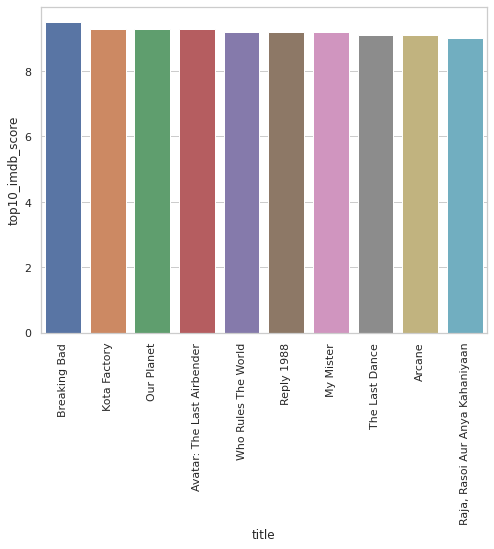

,title,top10_imdb_score
748,Breaking Bad,9.5
2393,Kota Factory,9.3
3227,Our Planet,9.3
443,Avatar: The Last Airbender,9.3
5300,Who Rules The World,9.2
3530,Reply 1988,9.2
2985,My Mister,9.2
4507,The Last Dance,9.1
393,Arcane,9.1
3471,"Raja, Rasoi Aur Anya Kahaniyaan",9.0


In [118]:
top10_imdbscore = (df
            .groupby('title')
            .agg(top10_imdb_score=('imdb_score','max'))
            .reset_index()
            .sort_values('top10_imdb_score',ascending=False)
            .head(10)
            )


plt.figure(figsize=(8,6))
sns.barplot(data=top10_imdbscore, x='title', y='top10_imdb_score')
plt.xticks(rotation=90)
plt.show()


plt.show()
top10_imdbscore

###Top 10 MOVIE/SHOW with highest `imdb_votes`

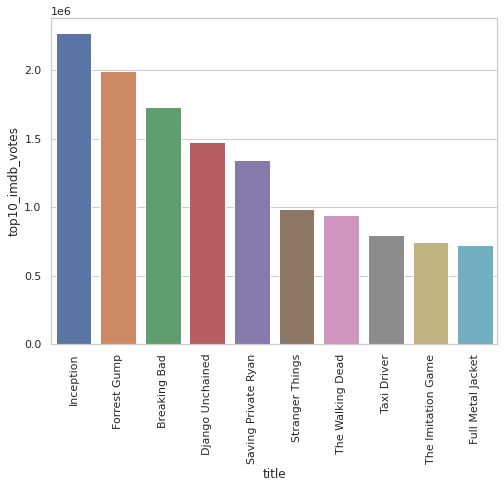

,title,top10_imdb_votes
2089,Inception,2268288.0
1571,Forrest Gump,1994599.0
748,Breaking Bad,1727694.0
1258,Django Unchained,1472668.0
3701,Saving Private Ryan,1346020.0
4010,Stranger Things,989090.0
4828,The Walking Dead,945125.0
4114,Taxi Driver,795222.0
4459,The Imitation Game,748654.0
1613,Full Metal Jacket,723306.0


In [119]:
top10_imdbvotes = (df
            .groupby('title')
            .agg(top10_imdb_votes=('imdb_votes','max'))
            .reset_index()
            .sort_values('top10_imdb_votes',ascending=False)
            .head(10)
            )

plt.figure(figsize=(8,6))
sns.barplot(data=top10_imdbvotes, x='title', y='top10_imdb_votes')
plt.xticks(rotation=90)
plt.show()


plt.show()
top10_imdbvotes

###Top 10 MOVIE/SHOW with highest `tmdb_popularity`

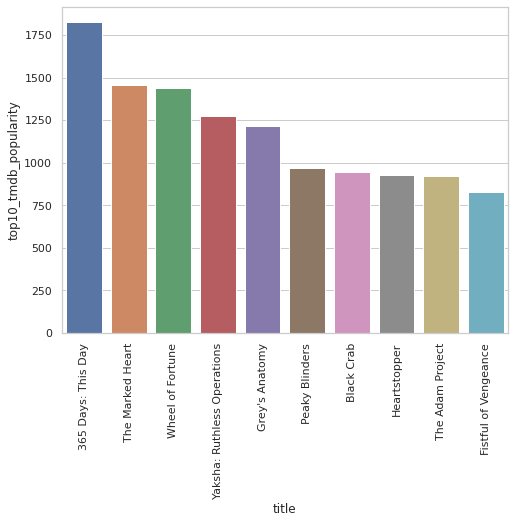

,title,top10_tmdb_popularity
48,365 Days: This Day,1823.374
4571,The Marked Heart,1455.085
5270,Wheel of Fortune,1440.855
5361,Yaksha: Ruthless Operations,1275.252
1762,Grey's Anatomy,1215.393
3301,Peaky Blinders,971.727
636,Black Crab,944.405
1855,Heartstopper,926.362
4171,The Adam Project,919.599
1539,Fistful of Vengeance,829.005


In [120]:
top10_tmdbpopularity = (df
            .groupby('title')
            .agg(top10_tmdb_popularity=('tmdb_popularity','max'))
            .reset_index()
            .sort_values('top10_tmdb_popularity',ascending=False)
            .head(10)
            )

plt.figure(figsize=(8,6))
sns.barplot(data=top10_tmdbpopularity, x='title', y='top10_tmdb_popularity')
plt.xticks(rotation=90)
plt.show()


plt.show()
top10_tmdbpopularity

###Top 10 MOVIE/SHOW with highest `seasons`

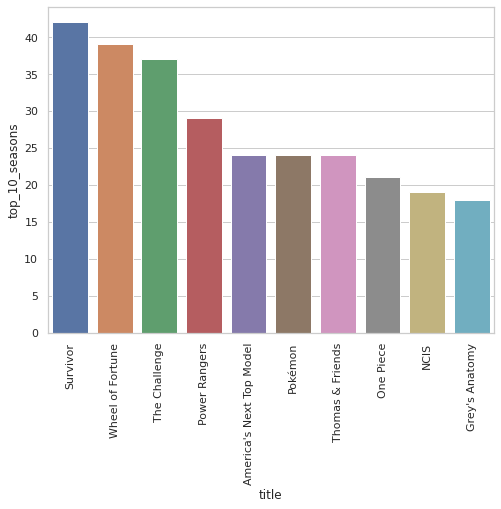

,title,top_10_seasons
4062,Survivor,42.0
5270,Wheel of Fortune,39.0
4264,The Challenge,37.0
3374,Power Rangers,29.0
308,America's Next Top Model,24.0
3353,Pokémon,24.0
4898,Thomas & Friends,24.0
3185,One Piece,21.0
3013,NCIS,19.0
1762,Grey's Anatomy,18.0


In [121]:
top10_seasons = (df
            .groupby('title')
            .agg(top_10_seasons=('seasons','max'))
            .reset_index()
            .sort_values('top_10_seasons',ascending=False)
            .head(10)
            )

plt.figure(figsize=(8,6))
sns.barplot(data=top10_seasons, x='title', y='top_10_seasons')
plt.xticks(rotation=90)
plt.show()


plt.show()
top10_seasons

###Top 10 MOVIE/SHOW with highest `runtime`

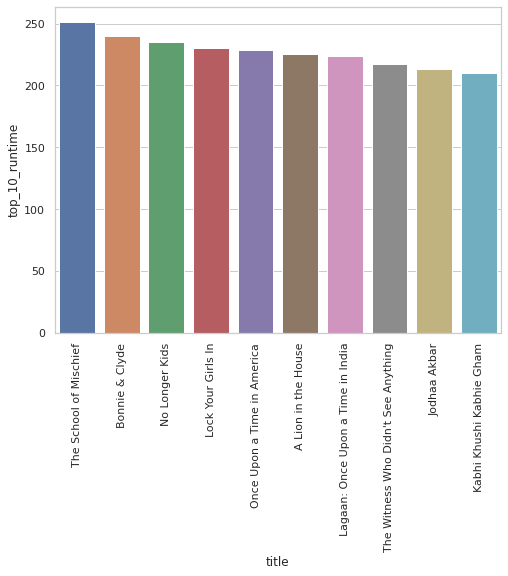

,title,top_10_runtime
4725,The School of Mischief,251
716,Bonnie & Clyde,240
3101,No Longer Kids,235
2544,Lock Your Girls In,230
3171,Once Upon a Time in America,229
121,A Lion in the House,225
2446,Lagaan: Once Upon a Time in India,224
4854,The Witness Who Didn't See Anything,217
2239,Jodhaa Akbar,213
2299,Kabhi Khushi Kabhie Gham,210


In [122]:
top10_runtime = (df
            .groupby('title')
            .agg(top_10_runtime=('runtime','max'))
            .reset_index()
            .sort_values('top_10_runtime',ascending=False)
            .head(10)
            )

plt.figure(figsize=(8,6))
sns.barplot(data=top10_runtime, x='title', y='top_10_runtime')
plt.xticks(rotation=90)
plt.show()


plt.show()
top10_runtime

###Analysis of `runtime` of MOVIE/SHOW

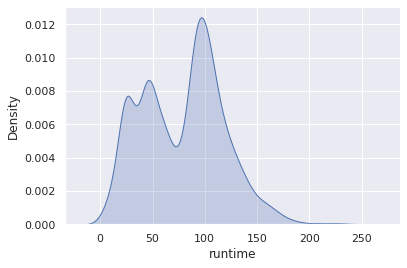

In [123]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['runtime'], shade=True)

###Analysis of `seasons` of MOVIE/SHOW

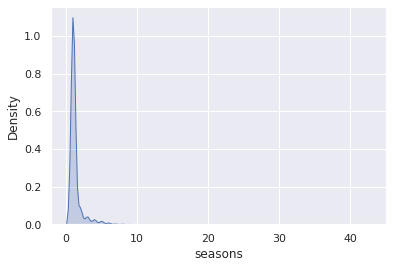

In [124]:
sns.set(style="darkgrid")
sns.kdeplot(data=df['seasons'], shade=True)

###Best Average `imdb_score` between Top 10 `production_countries`

In [125]:
top10_countries = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR']
df_country = df[df['production_countries'].isin(top10_countries)]
df_country.production_countries = df_country.production_countries.str.replace("US",'United_States').str.replace("GB",'United_Kingdom').str.replace("IN",'India').str.replace("KR",'Korea').str.replace("JP",'Japan').str.replace("CA",'Canada').str.replace("ES",'Spain').str.replace("MX",'Mexico').str.replace("FR",'France').str.replace("BR",'Brazil')
country_imdbscore = (df_country
            .groupby('production_countries')
            .agg(country_imdb_score=('imdb_score','mean'))
            .reset_index()
            .sort_values('country_imdb_score',ascending=False)
            .head(10)
            )
country_imdbscore

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,production_countries,country_imdb_score
5,Korea,7.163592
4,Japan,7.041825
8,United_Kingdom,6.975926
9,United_States,6.556413
1,Canada,6.478000
7,Spain,6.412102
3,India,6.395110
6,Mexico,6.387368
2,France,6.379032
0,Brazil,6.169048


###Best Average `tmdb_score` between Top 10 `production_countries`

In [126]:
top10_countries = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR']
df_country = df[df['production_countries'].isin(top10_countries)]
df_country.production_countries = df_country.production_countries.str.replace("US",'United_States').str.replace("GB",'United_Kingdom').str.replace("IN",'India').str.replace("KR",'Korea').str.replace("JP",'Japan').str.replace("CA",'Canada').str.replace("ES",'Spain').str.replace("MX",'Mexico').str.replace("FR",'France').str.replace("BR",'Brazil')
country_tmdbscore = (df_country
            .groupby('production_countries')
            .agg(country_tmdb_score=('tmdb_score','mean'))
            .reset_index()
            .sort_values('country_tmdb_score',ascending=False)
            .head(10)
            )
country_tmdbscore

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,production_countries,country_tmdb_score
5,Korea,7.725243
4,Japan,7.376806
0,Brazil,7.103571
8,United_Kingdom,7.068056
6,Mexico,7.032632
1,Canada,6.885000
9,United_States,6.840042
7,Spain,6.687261
2,France,6.674194
3,India,6.399325


###Top 10 `production_countries` and which one has the Best `imdb_score` (Boxplot)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



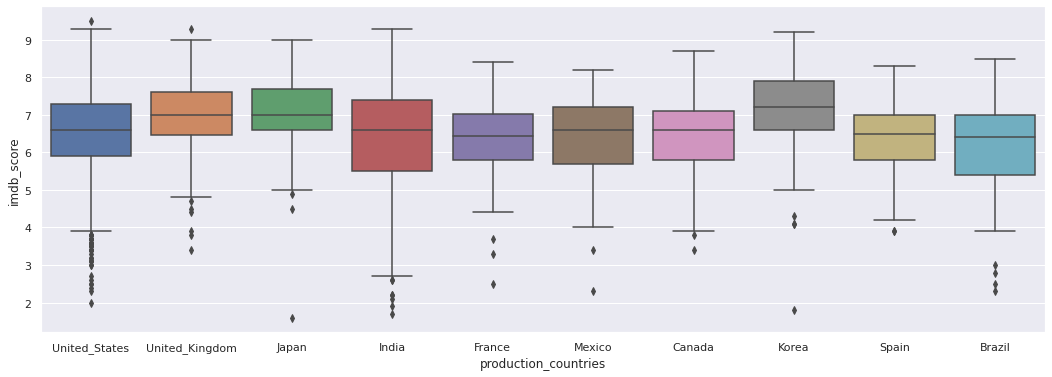

In [127]:
top10_countries = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR']
df_country = df[df['production_countries'].isin(top10_countries)]
df_country.production_countries = df_country.production_countries.str.replace("US",'United_States').str.replace("GB",'United_Kingdom').str.replace("IN",'India').str.replace("KR",'Korea').str.replace("JP",'Japan').str.replace("CA",'Canada').str.replace("ES",'Spain').str.replace("MX",'Mexico').str.replace("FR",'France').str.replace("BR",'Brazil')
plt.figure(figsize=(18,6))
sns.boxplot(data=df_country,
            x='production_countries',
            y='imdb_score')

###Top 10 `production_countries` and which one has the Best `tmdb_score` (Boxplot)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



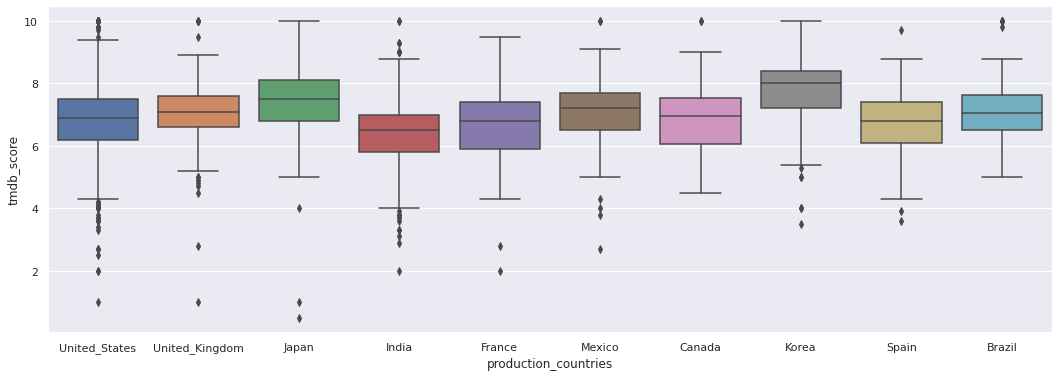

In [128]:
top10_countries = ['US','IN','JP','GB','KR','ES','FR','CA','MX','BR']
df_country = df[df['production_countries'].isin(top10_countries)]
df_country.production_countries = df_country.production_countries.str.replace("US",'United_States').str.replace("GB",'United_Kingdom').str.replace("IN",'India').str.replace("KR",'Korea').str.replace("JP",'Japan').str.replace("CA",'Canada').str.replace("ES",'Spain').str.replace("MX",'Mexico').str.replace("FR",'France').str.replace("BR",'Brazil')
plt.figure(figsize=(18,6))
sns.boxplot(data=df_country,
            x='production_countries',
            y='tmdb_score')

###How is yearly average imdb_score profile (time series)?

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]), <a list of 10 Text major ticklabel objects>)

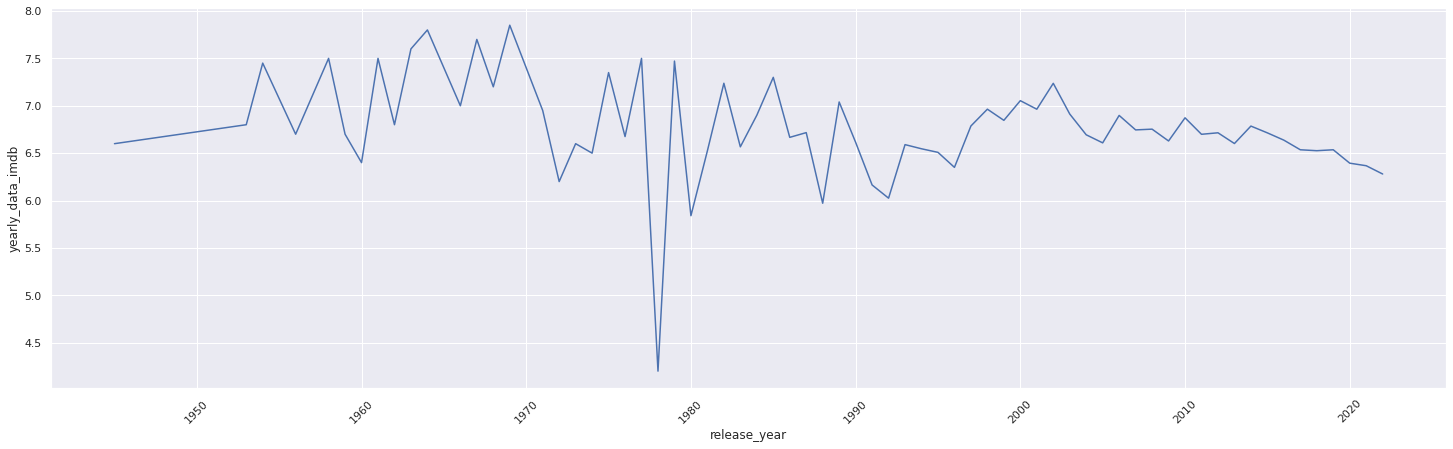

In [129]:
yearly_dataimdb = (df
            .groupby('release_year')
            .agg(yearly_data_imdb=('imdb_score','mean'))
            .reset_index())

plt.figure(figsize=(25,7))
sns.lineplot(data=yearly_dataimdb,
             x='release_year',
             y='yearly_data_imdb')
plt.xticks(rotation=45)

###How is yearly average tmdb_score profile (time series)?

(array([1940., 1950., 1960., 1970., 1980., 1990., 2000., 2010., 2020.,
        2030.]), <a list of 10 Text major ticklabel objects>)

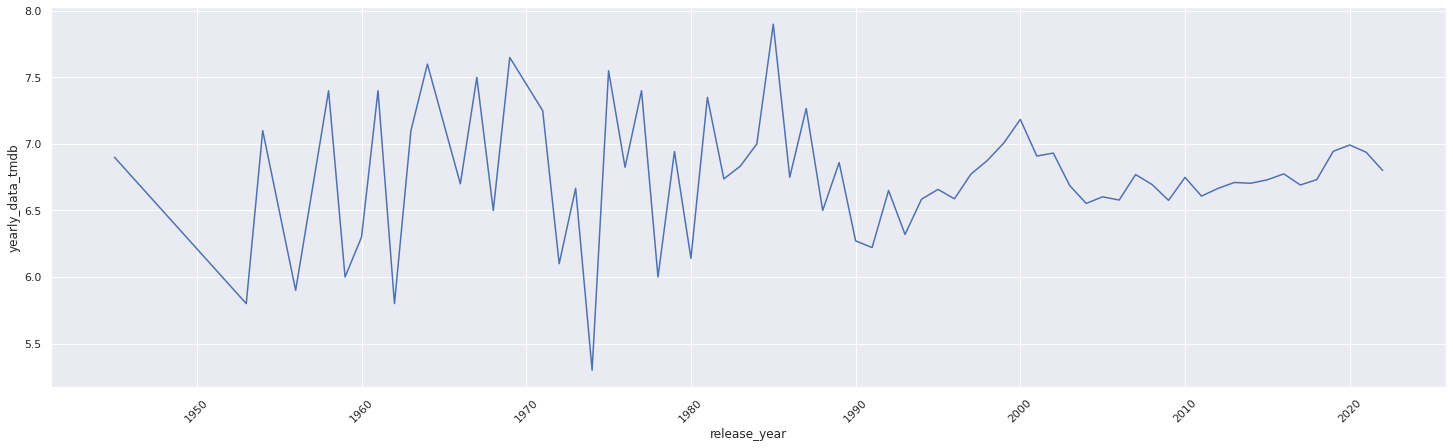

In [130]:
yearly_datatmdb = (df
            .groupby('release_year')
            .agg(yearly_data_tmdb=('tmdb_score','mean'))
            .reset_index())

plt.figure(figsize=(25,7))
sns.lineplot(data=yearly_datatmdb,
             x='release_year',
             y='yearly_data_tmdb')
plt.xticks(rotation=45)

##Pairplot of the Dataset

In this step, we are going to analyze the pairplot of the dataset:

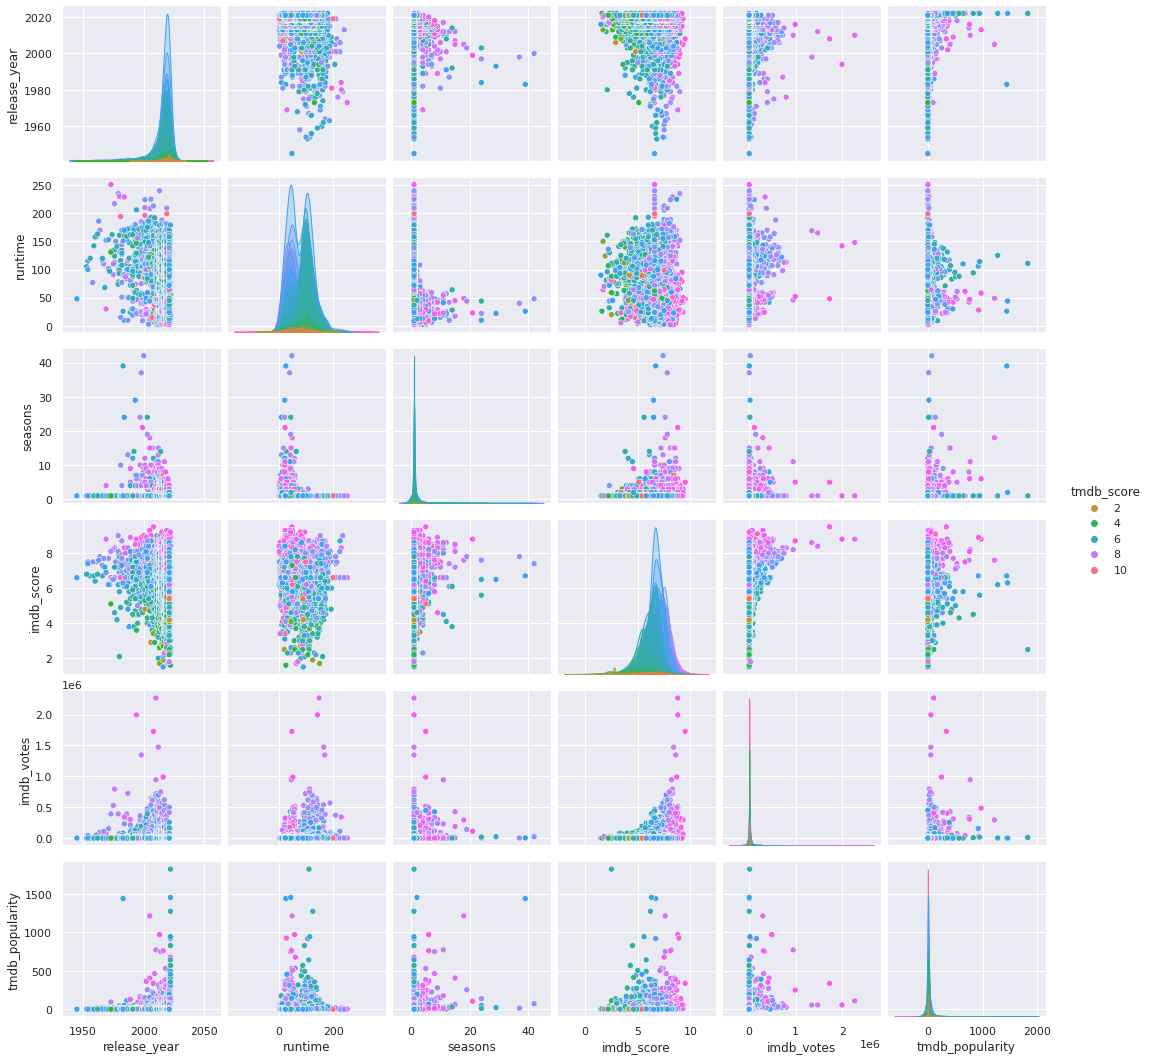

In [131]:
sns.pairplot(data, hue='tmdb_score',palette = "husl")

Interpretation:

1. MOVIE/SHOW with high `imdb_score`, `imdb_votes`, and `tmdb_popularity` are more likely to gain high `tmdb_score`
2. MOVIE/SHOW with many `seasons` tend to have average `tmdb_score`

##Correlation Heatmap

In this step, we are going to see if there isn't any features that are highly correlated to each other:

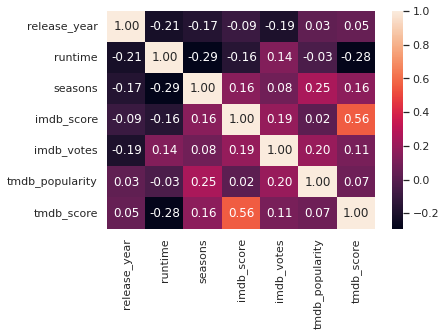

In [132]:
correlation = data.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')

Interpretation:

* There are no feature that are highly correlated to each other in the dataset, as all of the numbers in the correlation heatmap is below 0.7

## EDA Conclusion
1. There are only some NULL values in the database and We've handled them accordingly.
2. Overall, the minimum and maximum values make sense for each column.
3. Most of the columns with continuous numerical values are somewhat symmetric already.
4. From the boxplot we can see some outlier in every columns, thus we will probably need to perform log transformation in the next step.
5. In terms of the column distribution, column `imdb_votes` and `tmdb_popularity` are very positively skewed, thus probably need to be adjusted.
6. From the count graph, we can determine that the highest count for column `type`, `release_year`, `genres`, and `production_countries` are MOVIE, 2019, drama, and US, respectively.
7. There are many interesting insights about netflix in the dataset.
8. From pairplot, we can see that imdb_score, imdb_votes, and tmdb_popularity are positively correlated to tmdb_score.
9. From correlation heatmap: We can inspect that there isn't any variables that are highly correlated to each other.

##Dealing with Outliers and Skewed Distribution

In this step, we are going to deal with outliers and skewed distribution:

We will perform Log Transformation in every numerical column, except column `runtime` because the outliers is still acceptable

In [133]:
outlier_features =['seasons','imdb_score','imdb_votes','tmdb_popularity','tmdb_score']
for i in outlier_features:
    df[i] = np.log(df[i]+1)

Boxplot after Log Transformation:

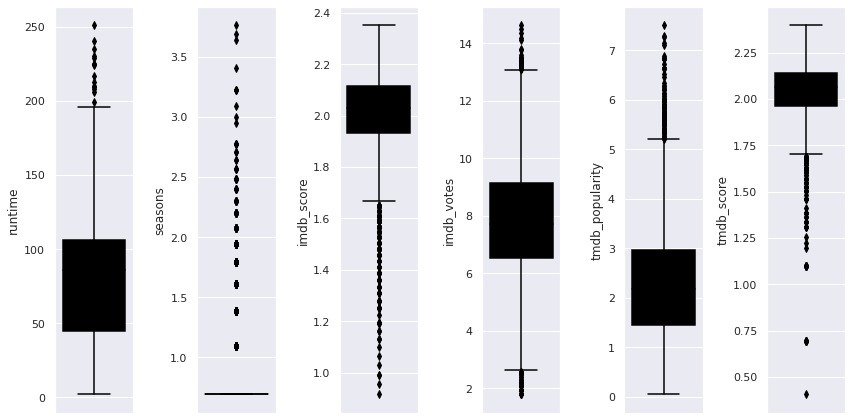

In [134]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='black')
    plt.tight_layout()

Column Distribution after Log Transformation:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.7/dist-packages/seaborn/di

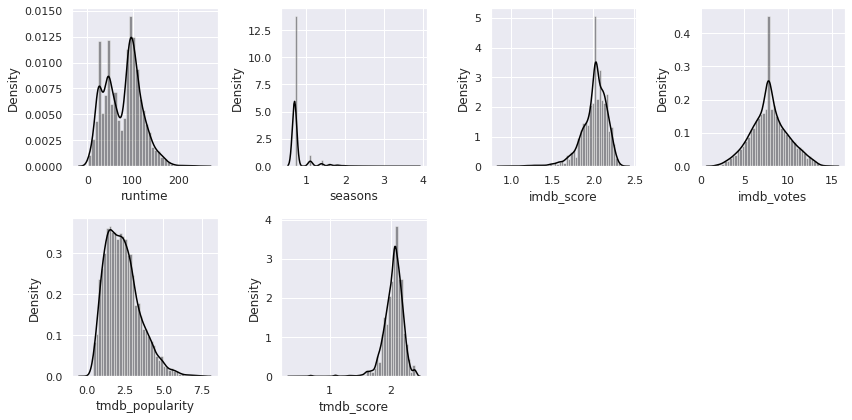

In [135]:
plt.figure(figsize=(12,6))
features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.distplot(x=df[features[i]], color='black')
    plt.xlabel(features[i])
    plt.tight_layout()

Interpretation:

* After Log Transformation, the outliers have become more acceptable and the skewed distribution in column `imdb_votes` and `tmdb_popularity` have become more symmetrical

#Modeling and Evaluation



In this step, we will use the cleaned data from previous step to create and evaluate regression models to determine which feature has the most impact on tmdb_score.

## Split Data: train - validate - test

In this step, we will split data into 3 part: training data, validation data, and testing data.


In [136]:
df.drop(['id', 'title', 'type', 'release_year', 'genres', 'production_countries'], axis=1, inplace=True)

In [137]:
feature =df[['runtime', 'seasons', 'imdb_score', 'imdb_votes', 'tmdb_popularity']]
target =df[['tmdb_score']]

feature_tmdb_pretrain, feature_tmdb_test, target_tmdb_pretrain, target_tmdb_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_tmdb_train, feature_tmdb_validation, target_tmdb_train, target_tmdb_validation = train_test_split(feature_tmdb_pretrain, target_tmdb_pretrain, test_size=0.20, random_state=42)

## Multicollinearity Check

### Calculate VIF Scores

* In this step, we are going to calculate the VIF scores to inspect if there is any features that are highly correlated to each other.  

In [138]:
X = add_constant(feature_tmdb_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



,feature,vif_score
1,runtime,1.381167
2,seasons,1.334176
3,imdb_score,1.117799
4,imdb_votes,1.780395
5,tmdb_popularity,1.649603


Interpretation:
* All of the features have a very low VIF scores(<4), means there are no features that are highly correlated to each other.

### Correlation Analysis

* In this step, we are going to make a correlation heatmap to identify if there is any redundant feature to be dropped.

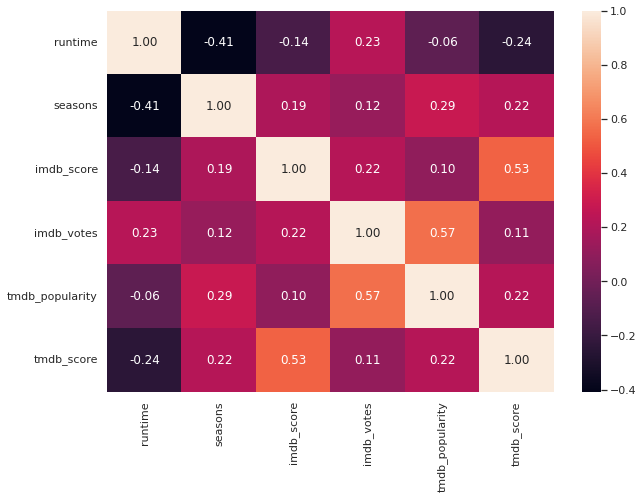

In [139]:
tmdb_train = pd.concat([feature_tmdb_train, target_tmdb_train], axis=1)
corr = tmdb_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Interpretation:

* There are no feature that are highly correlated to each other in the dataset, as all of the numbers in the correlation heatmap is below 0.7.
* As all of the numbers in the correlation heatmap is below 0.7, thus we do not need to drop any feature.

## Fit Multiple Models on Training Data

* In this step we are going to set lambdas (0.01, 0.1, 1, 10) on Training Data

### a. Ridge Regression

In [140]:
# train the model
X_tmdb_train = feature_tmdb_train.to_numpy()
y_tmdb_train = target_tmdb_train.to_numpy()
y_tmdb_train = y_tmdb_train.reshape(len(y_tmdb_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_tmdb_train, y_tmdb_train)
ridge_reg_pointone.fit(X_tmdb_train, y_tmdb_train)
ridge_reg_one.fit(X_tmdb_train, y_tmdb_train)
ridge_reg_ten.fit(X_tmdb_train, y_tmdb_train)

Ridge(alpha=10, random_state=42)

### b. LASSO

In [141]:
# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model : ini siswa lagi belajar
lasso_reg_pointzeroone.fit(X_tmdb_train, y_tmdb_train)
lasso_reg_pointone.fit(X_tmdb_train, y_tmdb_train)
lasso_reg_one.fit(X_tmdb_train, y_tmdb_train)
lasso_reg_ten.fit(X_tmdb_train, y_tmdb_train)

Lasso(alpha=10, random_state=42)

## Choose the Best Lambda from Validation Set

### a. Use RMSE as metric

#### Ridge Regression

In [142]:
X_tmdb_validation = feature_tmdb_validation.to_numpy()
y_tmdb_validation = target_tmdb_validation.to_numpy()
y_tmdb_validation = y_tmdb_validation.reshape(len(y_tmdb_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_tmdb_validation)
    rmse = np.sqrt(mean_squared_error(y_tmdb_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 0.13843489242855359
RMSE of Ridge regression model with alpha = 0.1 is 0.13843467290586758
RMSE of Ridge regression model with alpha = 1.0 is 0.1384352561935632
RMSE of Ridge regression model with alpha = 10 is 0.13866090607746615


Interpretation:
* Best alpha for Ridge Regression (the smallest RSME) is ridge_reg_pointone (alpha=0.1)

#### LASSO

In [143]:
lasso_models = [lasso_reg_pointzeroone,
                lasso_reg_pointone,
                lasso_reg_one,
                lasso_reg_ten]

for model, alpha in zip(lasso_models, alphas):
    y_predict_validation = model.predict(X_tmdb_validation)
    rmse = np.sqrt(mean_squared_error(y_tmdb_validation,y_predict_validation))
    print(f'RMSE of Lasso regression model with alpha = {alpha} is {rmse}')

RMSE of Lasso regression model with alpha = 0.01 is 0.1522883478109318
RMSE of Lasso regression model with alpha = 0.1 is 0.15875508808377045
RMSE of Lasso regression model with alpha = 1.0 is 0.16169937110483976
RMSE of Lasso regression model with alpha = 10 is 0.16478954051119668


Interpretation:
* Best alpha for LASSO (the smallest RSME) is lasso_reg_pointzeroone (alpha=0.01)

### b. Interpret the coefficients of the best model

We will choose Ridge Regression model over LASSO model as it has smaller RMSE

In [144]:
ridge_best = ridge_reg_pointone

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_tmdb_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,1.060299
1,runtime,-0.000518
2,seasons,0.011462
3,imdb_score,0.498491
4,imdb_votes,-0.006658
5,tmdb_popularity,0.028966


Interpretation:

* `intercept` 1.060299: by assuming other features are 0, the expected value of `tmdb_score` is 1.060299
* `runtime` -0.000518: by assuming other features are constant, an increase of 1 on `runtime` is associated with an increase of -0.000518 on `tmdb_score`
* `seasons` 0.011462: by assuming other features are constant, an increase of 1 on `seasons` is associated with an increase of 0.011462 on `tmdb_score`
* `imdb_score` 0.498491: by assuming other features are constant, an increase of 1 on `imdb_score` is associated with an increase of 0.498491 on `tmdb_score`
* `imdb_votes` -0.006658: by assuming other features are constant, an increase of 1 on `imdb_votes` is associated with an increase of -0.006658 on `tmdb_score`
* `tmdb_popularity` 0.028966: by assuming other features are constant, an increase of 1 on `tmdb_popularity` is associated with an increase of 0.028966 on `tmdb_score`
* The information above shows that `imdb_score` is the feature with the most impact on `tmdb_score`

## Model Diagnostic

### R2 Score

In [145]:
ridge_best = ridge_reg_pointzeroone
y_predict_train = ridge_best.predict(X_tmdb_train)

print('R-squared for training data is {}'.format(r2_score(y_tmdb_train, y_predict_train)))

R-squared for training data is 0.34348525486861003


Interpretation: 
* 34.34% of variability of `tmdb_score` is successfully explained using all the features in the model, thus has to be improved further

### Residual Plot

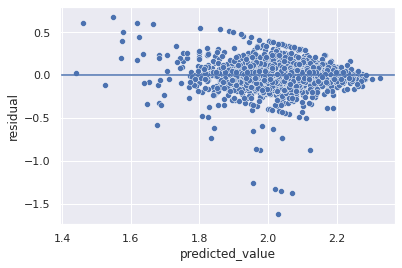

In [146]:
residual = y_tmdb_train - y_predict_train

df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Assumptions to check via residual plot:

- Residuals do not have Constant Variance
- Residuals are independent as we can see a random pattern

## Evaluate the Best Model on Test Data

### Training Error

In [147]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_tmdb_train)

In [148]:
print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_tmdb_train, y_predict_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_tmdb_train, y_predict_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_tmdb_train, y_predict_train)))

RMSE for training data is 0.12751672004606798
MAE for training data is 0.08099928165240736
MAPE for training data is 0.04332516188128774


### Testing Error

In [149]:
# prepare prediction result on test data
X_tmdb_test = feature_tmdb_test.to_numpy()
y_predict_test = ridge_best.predict(X_tmdb_test)

# ground truth target
y_tmdb_test = target_tmdb_test.to_numpy()
y_tmdb_test = y_tmdb_test.reshape(len(y_tmdb_test),)

In [150]:
print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_tmdb_test, y_predict_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_tmdb_test, y_predict_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_tmdb_test, y_predict_test)))

RMSE for testing data is 0.14066117124588098
MAE for testing data is 0.08508045543687413
MAPE for testing data is 0.04678169123035475


Interpretation:
- By using Ridge Regression, on average, our prediction deviates the true `tmdb_score` by 0.043 (for training data) and 0.046 (for testing data) 
- MAPE for training data < 0.1 (Shows that Model is not Underfit).
- Difference between MAPE from training and testing data is less than 0.1 (Shows that Model is Not Overfit).
- There is not much difference in RMSE, MAE, and MAPE between training and testing data.

So we can conclude that the Model is acceptable/ just right

##Conclusion

* We split the data into: training data, validation data, and testing data.
* From Multicollinearity Check, we can see that there is no features that are highly correlated to each other, thus there is no need to drop any feature.
* By using RMSE as a metric, we can see that Ridge Regression Model with alpha=0.1 is the best model because it has the smallest RMSE.
* By interpreting the best model, **we finally can determine that `imdb_score` is the feature with the most impact on `tmdb_score`** (answering the problem statement of this project).
* From model diagnostic, we can see that the R-squared for training data is 34% and the residual plot doesn't show constant variance, but the residuals are independent (random pattern).
* By evaluating the test data, we can conclude that the data is acceptable (not overfitting or underfitting).


#**THANK YOU :)**